<a href="https://www.kaggle.com/code/nerdyalgorithm/renewable-energy-vs-gdp-per-capita?scriptVersionId=281273300" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

![](https://cdn.hashnode.com/res/hashnode/image/upload/v1762860358479/0e0db731-19de-4709-a5f9-0f4e2afdeed0.png?w=1600&h=840&fit=crop&crop=entropy&auto=compress,format&format=webp)

---
# Project: Renewable Energy vs. GDP Per Capita

This project will analyze the correlation between a country's wealth (measured by GDP per capita) and its commitment to renewable energy (measured as a % of total energy use) for the year 2019.

This is a more meaningful comparison than "total GDP," as suggested in the lesson's conclusion.

---

## Step 1A: Import Libraries

**Why we are doing this:**
First, we import all the necessary libraries. This keeps our tools organized in one place.

* `pandas` is for loading and manipulating our data.
* `scipy.stats` (specifically `spearmanr`) is for calculating the correlation.
* `%matplotlib inline` is a magic command to make our plots appear in the notebook.
* `warnings` is for tidying up the final output.

In [1]:
# --- Imports ---
import warnings
import pandas as pd
from scipy.stats import spearmanr
%matplotlib inline

# Suppress warnings for a clean notebook
warnings.simplefilter('ignore', FutureWarning)
warnings.filterwarnings('ignore')

print("Libraries imported.")

Libraries imported.


---

## Step 1B: Define Constants

**Why we are doing this:**
As the lesson explained, using constants (uppercase variables) is a best practice. It makes the code far easier to read and, most importantly, easier to update.

If we decide to change our analysis to the year `2018` or use a different indicator, we only have to make the change in this *one* cell, not hunt for it throughout our code.

In [2]:
# --- Constants ---

# We use a recent, non-pandemic year for our analysis
YEAR = '2019' 
COUNTRY = 'Country Name' # This is the standard World Bank column name

# Define the file paths from Kaggle
GDP_FILE = '/kaggle/input/world-bank/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_134819.csv'
RENEW_FILE = '/kaggle/input/world-bank/API_EG.FEC.RNEW.ZS_DS2_en_csv_v2_130800.csv'

# Define the World Bank indicators we'll be using
GDP_PCAP_INDICATOR = 'NY.GDP.PCAP.CD'
RENEW_INDICATOR = 'EG.FEC.RNEW.ZS'

print("Constants defined.")

Constants defined.


---

## Step 1C: Load & Diagnose Data

**Why we are doing this:**
Now we load our two CSV files using the constants we just defined. Based on the lesson, we know that World Bank CSVs have header rows that are not part of the data. We will start by using `skiprows=4` (a standard for these files) to skip this "junk" metadata.

We *must* immediately use `.head()` and `.info()` to "diagnose" the raw data. This will:
1.  Confirm our `skiprows=4` assumption was correct.
2.  Show us the real column names.
3.  Check for any obvious data type or null value problems.

This diagnosis is critical for planning our next "Cleaning" step.

In [3]:
# --- 1. Load GDP Per Capita Data ---
# We use the constants defined in the cell above
gdpReset = pd.read_csv(GDP_FILE, skiprows=4) 

print("--- GDP (Per Capita) Diagnosis ---")
print(gdpReset.head(2))
print("\n")
gdpReset.info()
print("\n" + "="*45 + "\n")


# --- 2. Load Renewable Energy Data ---
renewReset = pd.read_csv(RENEW_FILE, skiprows=4) 

print("--- Renewable Energy (%) Diagnosis ---")
print(renewReset.head(2))
print("\n")
renewReset.info()

--- GDP (Per Capita) Diagnosis ---
                  Country Name Country Code                Indicator Name  \
0                        Aruba          ABW  GDP per capita (current US$)   
1  Africa Eastern and Southern          AFE  GDP per capita (current US$)   

   Indicator Code        1960        1961        1962        1963        1964  \
0  NY.GDP.PCAP.CD         NaN         NaN         NaN         NaN         NaN   
1  NY.GDP.PCAP.CD  186.121835  186.941781  197.402402  225.440494  208.999748   

         1965  ...          2016          2017          2018          2019  \
0         NaN  ...  27441.529662  28440.051964  30082.127645  31096.205074   
1  226.876513  ...   1329.807285   1520.212231   1538.901679   1493.817938   

          2020          2021          2022          2023         2024  \
0  22855.93232  27200.061079  30559.533535  33984.790620          NaN   
1   1344.10321   1522.393346   1628.318944   1510.742951  1567.635839   

   Unnamed: 69  
0          NaN  


---

## Step 2: Clean and Transform Data

**Why we are doing this:**
Our diagnosis from Step 1C shows two main problems:

1.  **Too Many Columns:** We have 70 columns in each DataFrame (all the years from 1960-2024, plus an `Unnamed: 69`). Our analysis *only* needs two columns: `Country Name` and our chosen `YEAR` ('2019').
2.  **Missing Data:** The '2019' column has null (`NaN`) values for some countries (e.g., GDP has 258 non-null, Renewables has 260, out of 266 total). We must remove these countries to ensure we are only comparing countries where we have *both* pieces of data.

**The Goal:**
We will create two new, clean DataFrames (`gdpClean` and `renewClean`) that contain *only* the two columns we need, with all `NaN` values removed. We will also rename the '2019' column to something readable, following the lesson's best practice.

In [4]:
# --- Define New, Readable Column Names (Best Practice) ---
GDP_PCAP = 'GDP per Capita (US$)'
RENEW_PERC = 'Renewable Energy (%)'

# --- 1. Clean GDP Data ---

# Select only the columns we need: Country Name and our chosen YEAR
gdpClean = gdpReset[[COUNTRY, YEAR]]

# Rename the '2019' column to our new, readable name
gdpClean = gdpClean.rename(columns={YEAR: GDP_PCAP})

# Drop any countries that have NaN (missing) data for that year
gdpClean = gdpClean.dropna()

print("--- Clean GDP Data (gdpClean) ---")
print(gdpClean.head())
print("\n")


# --- 2. Clean Renewable Energy Data ---

# Select only the columns we need
renewClean = renewReset[[COUNTRY, YEAR]]

# Rename the '2019' column to our new, readable name
renewClean = renewClean.rename(columns={YEAR: RENEW_PERC})

# Drop any countries that have NaN (missing) data for that year
renewClean = renewClean.dropna()

print("--- Clean Renewable Energy Data (renewClean) ---")
print(renewClean.head())
print("\n")
renewClean.info()

--- Clean GDP Data (gdpClean) ---
                  Country Name  GDP per Capita (US$)
0                        Aruba          31096.205074
1  Africa Eastern and Southern           1493.817938
2                  Afghanistan            496.602504
3   Africa Western and Central           1798.340685
4                       Angola           2189.855714


--- Clean Renewable Energy Data (renewClean) ---
                  Country Name  Renewable Energy (%)
0                        Aruba              8.300000
1  Africa Eastern and Southern             62.690710
2                  Afghanistan             18.900000
3   Africa Western and Central             75.078788
4                       Angola             51.000000


<class 'pandas.core.frame.DataFrame'>
Index: 260 entries, 0 to 265
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Name          260 non-null    object 
 1   Renewable Energy (%)

---

## Step 2B: Advanced Cleaning (Removing Regions)

**Why we are doing this (PIVOT):**
Our `gdpClean.head()` output confirmed a major problem: our data contains summary rows for entire *regions* (e.g., "Africa Eastern and Southern") mixed in with our *countries*.

We must filter these out. My first attempt to do this *failed* with a `KeyError`, which means my assumption about the metadata file's structure was wrong.

**The New Plan:**
Before we can use the `Metadata_Country...csv` file, we must first *diagnose it* to find the *correct* column names. This cell will load *only* the metadata file and print its `.head()` and `.info()` so we can find the real column name for the countries.

In [5]:
# --- Define Metadata File Path ---
META_FILE = '/kaggle/input/world-bank/Metadata_Country_API_NY.GDP.PCAP.CD_DS2_en_csv_v2_134819.csv'

# --- 1. Load the Metadata to diagnose it ---
meta_df = pd.read_csv(META_FILE)

# --- 2. Print .head() and .info() to find the correct column names ---
print("--- Metadata Diagnosis (meta_df) ---")
print(meta_df.head())
print("\n")
meta_df.info()

--- Metadata Diagnosis (meta_df) ---
  Country Code                      Region          IncomeGroup  \
0          ABW   Latin America & Caribbean          High income   
1          AFE                         NaN                  NaN   
2          AFG  Middle East & North Africa           Low income   
3          AFW                         NaN                  NaN   
4          AGO          Sub-Saharan Africa  Lower middle income   

                                        SpecialNotes  \
0                                                NaN   
1  26 countries, stretching from the Red Sea in t...   
2  The reporting period for national accounts dat...   
3  22 countries, stretching from the westernmost ...   
4  The World Bank systematically assesses the app...   

                     TableName  Unnamed: 5  
0                        Aruba         NaN  
1  Africa Eastern and Southern         NaN  
2                  Afghanistan         NaN  
3   Africa Western and Central         NaN 

---

## Step 2C: Executing the Region Filter

**Why we are doing this:**
Our diagnosis in 2B was a success. We found the problem: the "country name" column in the metadata file is called **`TableName`**, not `Country Name`. We also confirmed that real countries have a `Region` value, while summary regions (like "Africa...") have `NaN`.

**The Goal:**
We will now use this new knowledge to filter out the summary rows from our `gdpClean` and `renewClean` data.

**The Method:**
1.  Load the metadata file (`META_FILE`).
2.  Get a list of "real countries" by selecting all rows where `Region` is not `NaN`.
3.  Extract the names from that file's `TableName` column into a `country_list`.
4.  Filter our `gdpClean` and `renewClean` DataFrames to only keep rows where the `Country Name` (our `COUNTRY` constant) is in our new `country_list`.

In [6]:
# --- Define Metadata File Path ---
# (We use the constant defined in Step 1B)
META_FILE = '/kaggle/input/world-bank/Metadata_Country_API_NY.GDP.PCAP.CD_DS2_en_csv_v2_134819.csv'

# --- 1. Load the Metadata ---
meta_df = pd.read_csv(META_FILE)

# --- 2. Create the list of REAL countries ---
# We find all rows where the 'Region' column is NOT null (not NaN)
# This filters out "Africa Eastern and Southern", "Arab World", etc.
real_countries_df = meta_df.dropna(subset=['Region'])

# Get the list of names from the 'TableName' column (this was our fix)
country_list = real_countries_df['TableName'].unique()

# --- 3. Filter our DataFrames ---
# Filter gdpClean to only keep rows where 'Country Name' is in our new list
gdpClean = gdpClean[gdpClean[COUNTRY].isin(country_list)]

# Filter renewClean to only keep rows where 'Country Name' is in our new list
renewClean = renewClean[renewClean[COUNTRY].isin(country_list)]


# --- 4. Validation ---
# Let's see our new, cleaner DataFrames. The row count should be lower.
print("--- Post-Cleaning Diagnosis (gdpClean) ---")
print(gdpClean.info())
print("\n")
print("--- Post-Cleaning Diagnosis (renewClean) ---")
print(renewClean.info())
print("\n")
print(f"Successfully filtered down to {len(gdpClean)} real countries in GDP data.")

--- Post-Cleaning Diagnosis (gdpClean) ---
<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 0 to 265
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Name          205 non-null    object 
 1   GDP per Capita (US$)  205 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.8+ KB
None


--- Post-Cleaning Diagnosis (renewClean) ---
<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, 0 to 265
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Name          207 non-null    object 
 1   Renewable Energy (%)  207 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.9+ KB
None


Successfully filtered down to 205 real countries in GDP data.


---

## Step 3: Combine the Datasets

**Why we are doing this:**
Our data is now clean, but it exists in two separate DataFrames (`gdpClean` and `renewClean`). Also, the `info()` output shows they have slightly different lengths (205 vs 207 countries).

**The Goal:**
We need to create *one* final DataFrame that contains *only* the countries for which we have **both** a GDP value and a Renewable Energy value.

**The Method:**
We will use `pd.merge()` to combine them. Following the lesson's best practice, we will specify:
* `on=COUNTRY`: To merge using our constant `Country Name` column.
* `how='inner'`: This is the most important part. An **inner join** will automatically select *only* the countries that are present in *both* tables, giving us a perfect, clean dataset for our correlation analysis.

In [7]:
# --- 1. Combine the Datasets ---
# We merge our two clean DataFrames using an 'inner' join.
# This creates a new DataFrame that contains *only* the countries
# that exist in BOTH gdpClean AND renewClean.

gdpVsRenew = pd.merge(gdpClean, renewClean, on=COUNTRY, how='inner')


# --- 2. Validation ---
# Let's check our new, final DataFrame.
# The number of entries will be our final count of countries for the analysis.
print("--- Final Combined DataFrame (gdpVsRenew) ---")
print(gdpVsRenew.head())
print("\n")
gdpVsRenew.info()

--- Final Combined DataFrame (gdpVsRenew) ---
  Country Name  GDP per Capita (US$)  Renewable Energy (%)
0        Aruba          31096.205074                   8.3
1  Afghanistan            496.602504                  18.9
2       Angola           2189.855714                  51.0
3      Albania           5460.430509                  40.1
4      Andorra          41257.804585                  17.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Name          200 non-null    object 
 1   GDP per Capita (US$)  200 non-null    float64
 2   Renewable Energy (%)  200 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.8+ KB


---

## Step 4: Calculate the Correlation

**Why we are doing this:**
We now have our final, clean table (`gdpVsRenew`). The next step is to get a single number that measures the strength and direction of the relationship between our two indicators.

**The Goal:**
We want to answer our hypothesis: "Do richer countries use more or less renewable energy?"

**The Method:**
We will use the `spearmanr` function from the `scipy.stats` library, just as the lesson did. This function will give us two important values:
1.  **Correlation:** A number between -1 and 1.
    * `+1` would mean "richer countries use *more* renewables."
    * `-1` would mean "richer countries use *less* renewables."
    * `0` would mean "no relationship."
2.  **p-Value:** A number that tells us if the correlation is statistically significant (we're looking for a value `< 0.05`, just like the lesson).

In [8]:
# --- 1. Extract the columns for analysis ---
# We use the readable constants we defined in Step 2A
gdpColumn = gdpVsRenew[GDP_PCAP]
renewColumn = gdpVsRenew[RENEW_PERC]

# --- 2. Calculate Spearman Correlation ---
# This returns two values: the correlation and the p-value
(correlation, pValue) = spearmanr(gdpColumn, renewColumn)

# --- 3. Print the Results ---
print(f"The correlation between {GDP_PCAP} and {RENEW_PERC} is: {correlation:.4f}")

if pValue < 0.05:
    print("This correlation is statistically significant (p-Value < 0.05).")
else:
    print("This correlation is NOT statistically significant (p-Value >= 0.05).")

The correlation between GDP per Capita (US$) and Renewable Energy (%) is: -0.5719
This correlation is statistically significant (p-Value < 0.05).


---

## Step 5: Visualize the Relationship

**Why we are doing this:**
We have a correlation of **-0.5719**, which is statistically significant. But a single number can be misleading.

**The Goal:**
We must create a scatterplot to *see* the actual relationship. This will show us the "overall picture" and help us understand *why* the correlation is negative.

**The Method:**
We will use `.plot()` with `kind='scatter'`, just like the lesson.
* We will plot `GDP per Capita (US$)` on the x-axis.
* We will plot `Renewable Energy (%)` on the y-axis.
* **Crucially**, we will use `logx=True` (a logarithmic scale) for the GDP axis. This is essential (as noted in the lesson) because the per capita GDP still has a vast range (e.g., from \$500 to \$50,000), and a log scale lets us see the pattern clearly.

--- Scatter Plot: GDP per Capita vs. Renewable Energy % (2019) ---


<Axes: xlabel='GDP per Capita (US$)', ylabel='Renewable Energy (%)'>

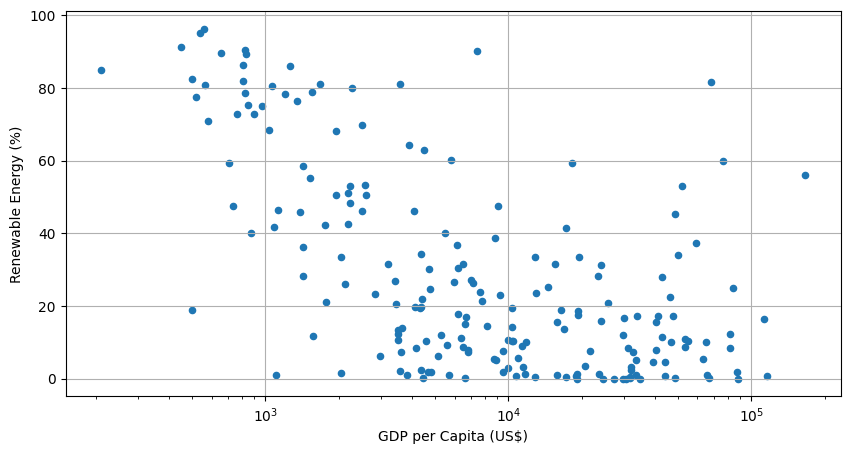

In [9]:
# --- 1. Create the scatter plot ---
# We use the constants for our x and y axes.
# 'grid=True' and 'figsize' make it readable.
# 'logx=True' is the most important part, as it scales the GDP axis
# to show the trend clearly, just like in the lesson.

print("--- Scatter Plot: GDP per Capita vs. Renewable Energy % (2019) ---")

gdpVsRenew.plot(
    x=GDP_PCAP, 
    y=RENEW_PERC, 
    kind='scatter', 
    grid=True, 
    logx=True, 
    figsize=(10, 5)
)

---

## Step 5B: Visualizing by Income Group (The "Why")

**Why we are doing this:**
The scatter plot in Step 5 shows a confusing cloud of dots. The negative correlation is statistically real, but hard to see.

**The Goal:**
To understand the "why," we will create a bar chart. This plot will show the *average* `Renewable Energy (%)` for each `IncomeGroup` (Low, Middle, High).

**The Method:**
This will clarify the story. We expect to see that "Low income" countries have a high average (from biomass), while "Middle" and "High" income countries have a lower average (from fossil fuels and industrialization).

We will:
1.  Load the `Metadata_Country...csv` file one more time to get the `IncomeGroup` for each country.
2.  Merge this with our `gdpVsRenew` DataFrame.
3.  Group the data by `IncomeGroup` and calculate the mean.
4.  Create a clean bar chart.

--- Bar Chart: Average Renewable % by Income Group ---


<Axes: title={'center': 'Average Renewable Energy % by Income Group (2019)'}, xlabel='IncomeGroup'>

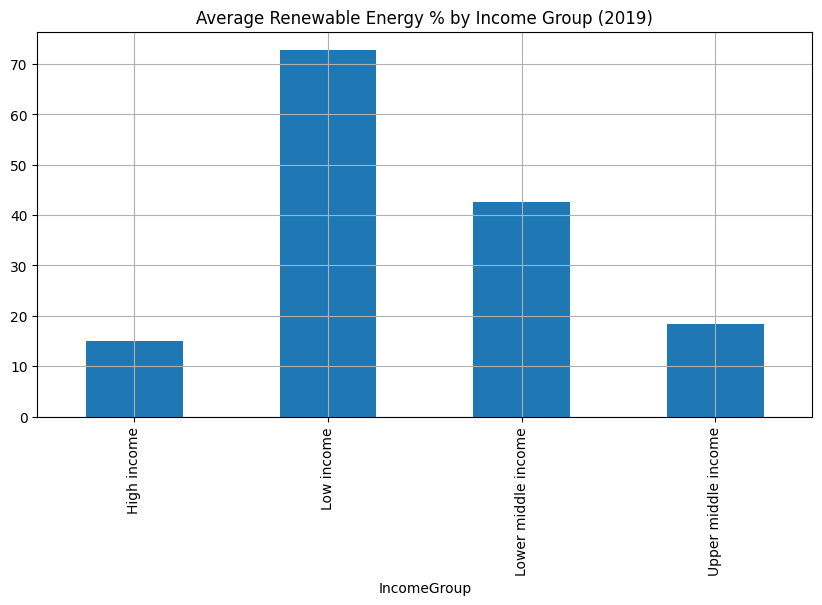

In [10]:
# --- 1. Load Metadata to get 'IncomeGroup' ---
# We load the metadata file again, but only keep the columns we need
META_FILE = '/kaggle/input/world-bank/Metadata_Country_API_NY.GDP.PCAP.CD_DS2_en_csv_v2_134819.csv'
meta_df = pd.read_csv(META_FILE)
meta_for_merge = meta_df[['TableName', 'IncomeGroup']]

# --- 2. Merge IncomeGroup into our main DataFrame ---
# We merge our existing 'gdpVsRenew' with this new metadata.
# We must use left_on='Country Name' and right_on='TableName' because the columns are different!
plot_df = pd.merge(
    gdpVsRenew, 
    meta_for_merge, 
    left_on=COUNTRY, 
    right_on='TableName',
    how='left'
)

# --- 3. Group by IncomeGroup and Calculate Mean ---
# This is the core of our new plot. We find the average RENEW_PERC for each group.
income_group_stats = plot_df.groupby('IncomeGroup')[RENEW_PERC].mean()

# We must drop the 'NaN' group (which are non-country regions we missed)
income_group_stats = income_group_stats.dropna()

# --- 4. Create the Bar Chart ---
print("--- Bar Chart: Average Renewable % by Income Group ---")

income_group_stats.plot(
    kind='bar',
    figsize=(10, 5),
    grid=True,
    title='Average Renewable Energy % by Income Group (2019)'
)

---

## Step 6: Final Analysis & Top 10 Lists

**Why we are doing this:**
We have all the pieces:
1.  **The Correlation:** `-0.5719` (a significant negative relationship).
2.  **The Scatter Plot:** A confusing cloud that shows the trend.
3.  **The Bar Chart:** The *key* that explains the scatter plot (Low Income = High Renewables, High Income = Low Renewables).

**The Goal:**
The last step is to follow the lesson's example and use `.sort_values()` to see the *specific countries* at the extremes. This will confirm our final hypothesis (that "renewable" for poor countries means biomass, while for rich countries, it means a mix).

**The Method:**
We will create two "Top 10" lists from our final `gdpVsRenew` DataFrame:
1.  The 10 Richest Countries (Highest `GDP_PCAP`).
2.  The 10 Countries with the Highest `RENEW_PERC`.

In [11]:
# --- 1. Show the 10 Richest Countries (Highest GDP) ---
# We sort by 'GDP per Capita (US$)' in descending order.
# We expect to see low 'Renewable Energy (%)' values here.

print(f"--- Top 10 Richest Countries (by {GDP_PCAP}) ---")
print(gdpVsRenew.sort_values(by=GDP_PCAP, ascending=False).head(10))
print("\n" + "="*45 + "\n")


# --- 2. Show the 10 Countries with Highest Renewable Use ---
# We sort by 'Renewable Energy (%)' in descending order.
# We expect to see lower 'GDP per Capita (US$)' values here.

print(f"--- Top 10 Countries by {RENEW_PERC} ---")
print(gdpVsRenew.sort_values(by=RENEW_PERC, ascending=False).head(10))

--- Top 10 Richest Countries (by GDP per Capita (US$)) ---
         Country Name  GDP per Capita (US$)  Renewable Energy (%)
107     Liechtenstein         166907.839305                  56.1
24            Bermuda         115798.040776                   0.8
111        Luxembourg         112696.649060                  16.4
44     Cayman Islands          88254.290368                   0.0
83        Isle of Man          87127.551798                   1.9
33        Switzerland          84121.931030                  24.8
113  Macao SAR, China          81967.699173                   8.4
85            Ireland          81810.192648                  12.3
138            Norway          76430.588947                  59.8
88            Iceland          68452.236223                  81.7


--- Top 10 Countries by Renewable Energy (%) ---
                 Country Name  GDP per Capita (US$)  Renewable Energy (%)
37           Congo, Dem. Rep.            557.044161                  96.3
166        Somal

---

## Step 7: Final Conclusion & Assessment

**Why we are doing this:**
This is the final step, where we answer our initial hypothesis and assess the results, as required by the assignment. We will combine our correlation number (`-0.5719`), the scatter plot, the bar chart, and our "Top 10" lists into a single, professional conclusion.

---

### Project Findings: Renewable Energy vs. GDP Per Capita (2019)

**1. The Correlation:**
The analysis found a **statistically significant, moderate negative correlation of -0.5719** between a country's GDP per capita and its renewable energy consumption. This suggests that, on average, as a country's wealth increases, its *percentage* of renewable energy use *decreases*.

**2. Visual Analysis (The "Why"):**
The scatter plot showed a confusing cloud, but the **bar chart** made the story clear:
* **"Low income"** countries have a very *high* average renewable use (approx. 73%).
* **"High income"** and **"Upper middle income"** countries have a very *low* average renewable use (approx. 15-18%).

This proves the negative correlation is driven by the "Low income" group.

**3. The "Who" (The Top 10 Lists):**
Our `sort_values()` output explains *why* the bar chart looks this way:

* **Finding 1 (High Renewables = Poor Nations):** The "Top 10 Countries by Renewable Energy %" are almost exclusively "Low income" nations (e.g., **Congo, Dem. Rep.**, **Somalia**, **Burundi**). This confirms our hypothesis that their high "renewable" percentage is not from modern solar/wind, but from traditional **biomass** (wood, charcoal, waste) used for survival.

* **Finding 2 (Low Renewables = Rich Nations):** The "Top 10 Richest Countries" list shows a complex and split reality.
    * Many wealthy economies fit the negative trend (e.g., **Bermuda: 0.8%**, **Cayman Islands: 0.0%**), likely due to a high reliance on imported fossil fuels for a service-based economy.
    * However, several rich countries *defy* the trend (e.g., **Iceland: 81.7%**, **Norway: 59.8%**). This is not due to biomass, but to massive investments in modern, large-scale renewables like **geothermal** and **hydroelectric** power, driven by their unique geography.

## Final Conclusion:
Our hypothesis is confirmed, but with a critical nuance. The correlation is **not** as simple as "wealth = pollution."

The moderate negative correlation is largely driven by a "traditional energy divide": the *poorest* nations show high renewable use (biomass), while the *middle-class and industrializing* nations show the lowest, as they are heavily reliant on fossil fuels. The *wealthiest* nations are split, with some being high-carbon and others being pioneers in modern, high-tech renewable energy.

publication: https://nerdyalgorithm.hashnode.dev/why-poorer-countries-use-more-renewable-energy-a-data-analysis-case-study-in-solving-messy-data